In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
data = pd.read_excel('data.xlsx', sheet_name='Total')
data.head()

,Week,Number_of_Facilities_Reporting,Total_Number_of_ED_Visits,CLI_Visits_Number,Percent_of_Total_Visits_for_CLI,ILI_Visits_Number,Percent_of_Total_Visits_for_ILI
0,201940,3343,2147390,23036,0.010727,19661,0.009156
1,201941,3340,2101183,23939,0.011393,20486,0.009750
2,201942,3342,2091824,26273,0.012560,22504,0.010758
3,201943,3343,2114358,27388,0.012953,23799,0.011256
4,201944,3358,2071510,29105,0.014050,25433,0.012278


C:\Users\samit\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


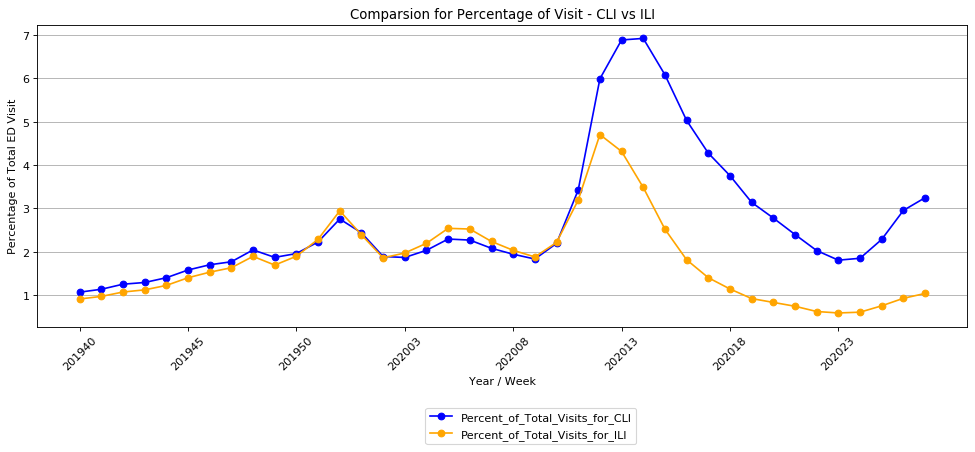

In [3]:
#Chart 1 - Percentage of Total ED Visits vs Week
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w')


x1 = data["Week"].astype(str)
y1 = data["Percent_of_Total_Visits_for_CLI"]*100
y2 = data["Percent_of_Total_Visits_for_ILI"]*100        
plt.plot(x1, y1, label = "Percent_of_Total_Visits_for_CLI", marker='o', color='b')
plt.plot(x1, y2, label = "Percent_of_Total_Visits_for_ILI", marker='o', color='orange')

plt.title('Comparsion for Percentage of Visit - CLI vs ILI')
plt.ylabel('Percentage of Total ED Visit')
plt.xlabel('Year / Week')
plt.legend(bbox_to_anchor=(0.65, -0.25))
plt.xticks(x1[::5], rotation=45)

plt.axes().yaxis.grid()

In [13]:
wdc = pd.read_csv('Weekly_Data_Counts.csv')
wdc.head()

,YEAR,WEEK_NUMBER,0-4 YR,5-17 YR,18-49 YR,50-64 YR,65+ YR,WE_Date,xlabel
0,2020,10,0,0,11,5,24,Jul-07-2020,Jul-07-2020 (10)
1,2020,11,0,0,54,76,88,Jul-14-2020,Jul-14-2020 (11)
2,2020,12,0,5,266,295,409,Jul-21-2020,Jul-21-2020 (12)
3,2020,13,7,5,640,803,1053,Jul-28-2020,Jul-28-2020 (13)
4,2020,14,11,11,650,1005,1417,Aug-04-2020,Aug-04-2020 (14)


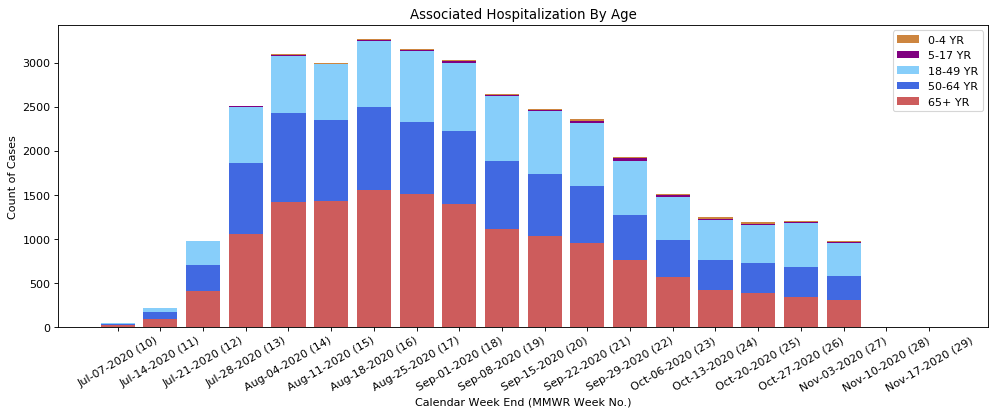

In [42]:
#Chart 2 - Associated Hospitalization By Age vs Count of Cases

fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w')


x1 = wdc["WEEK_NUMBER"]
ind = [x for x, _ in enumerate(x1)]

A = wdc["0-4 YR"]
B = wdc["5-17 YR"]
C = wdc["18-49 YR"]
D = wdc["50-64 YR"]
E = wdc["65+ YR"]

plt.bar(ind, A, width=0.8, label='0-4 YR', color='#CD853F', bottom=B+C+D+E)
plt.bar(ind, B, width=0.8, label='5-17 YR', color='purple', bottom=C+D+E)
plt.bar(ind, C, width=0.8, label='18-49 YR', color='lightskyblue', bottom=D+E)
plt.bar(ind, D, width=0.8, label='50-64 YR', color='royalblue', bottom=E)
plt.bar(ind, E, width=0.8, label='65+ YR', color='indianred')

plt.xticks(ind, wdc["xlabel"], rotation=30)
plt.ylabel("Count of Cases")
plt.xlabel("Calendar Week End (MMWR Week No.)")
plt.legend(loc="upper right")
plt.title("Associated Hospitalization By Age")


plt.show()


In [59]:
mortality = pd.read_excel('mortality.xlsx')
mortality.head()

,Year,Week,Total Deaths,Pneumonia_Influenza_or_COVID19_Deaths_Number,% _of_Total,Baseline,Threshold
0,2019,40,52563,2730,5.2,5.3,5.7
1,2019,41,53089,2799,5.3,5.4,5.7
2,2019,42,54335,3008,5.5,5.5,5.8
3,2019,43,54047,3027,5.6,5.6,5.9
4,2019,44,54084,2956,5.5,5.7,6.0


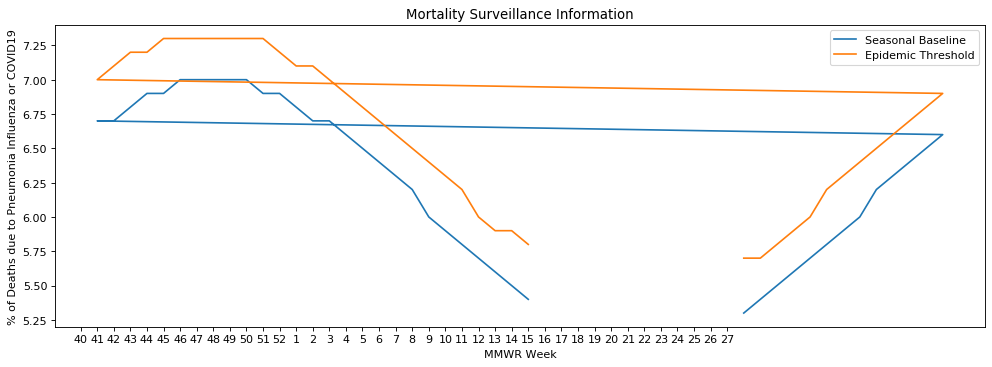

In [58]:
#Chart 3 - Associated Hospitalization By Age vs Count of Cases


fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w')

x1 = mortality["Week"]
y1 = mortality["Baseline"]
y2 = mortality["Threshold"]

ind = [x for x, _ in enumerate(x1)]

plt.plot(x1, y1,  label = "Seasonal Baseline")
plt.plot(x1, y2,  label = "Epidemic Threshold")

plt.xticks(ind, x1 )
plt.ylabel("% of Deaths due to Pneumonia Influenza or COVID19")
plt.xlabel("MMWR Week")
plt.legend(loc="upper right")
plt.title("Mortality Surveillance Information")


plt.show()